In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [12]:

df = pd.read_csv('./bench_SDRbench_and_jhtdb_lz4_comp.csv')
fsize=14

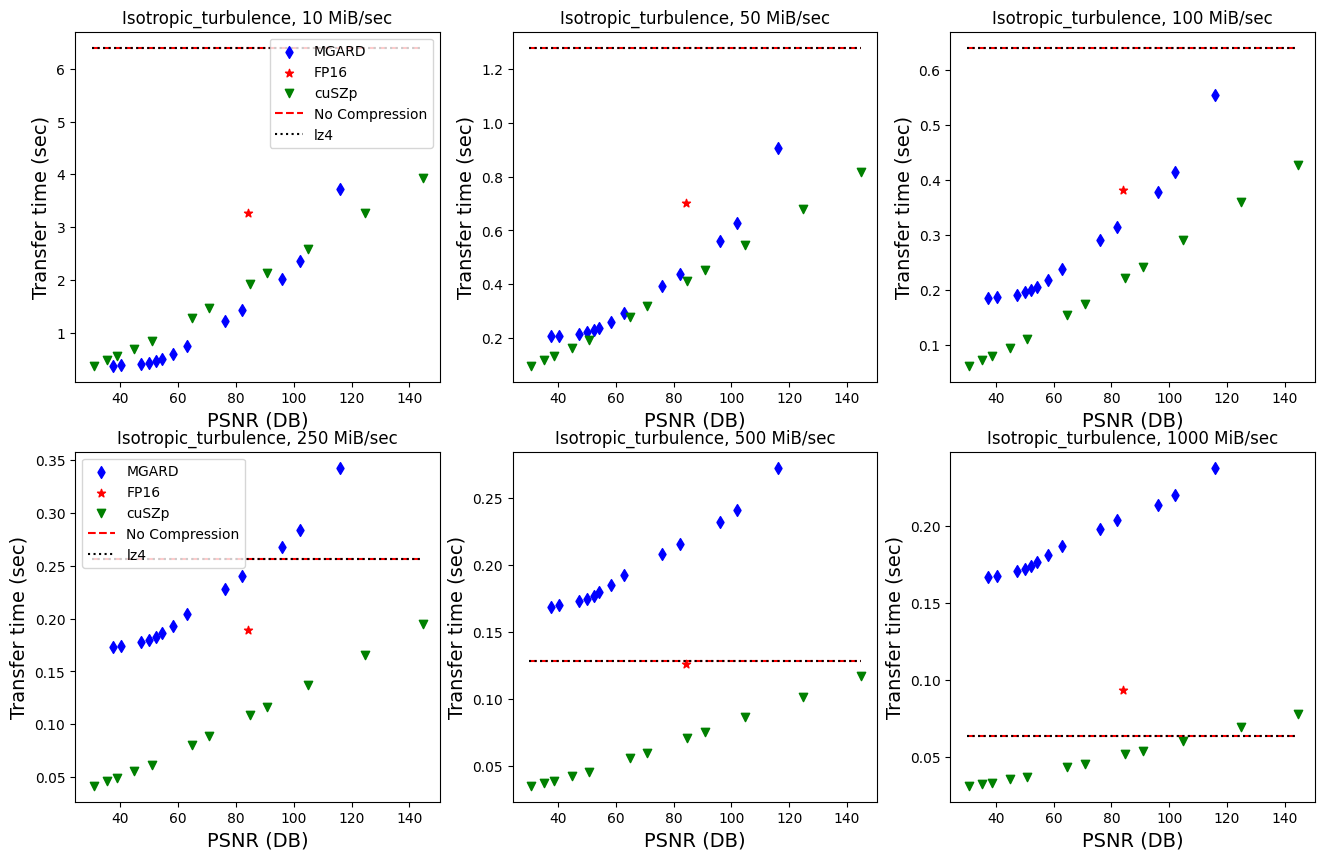

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10)) # (width and height)
filename = f""

# 1, 10, 100, 250, 500, 1000

targetsize = 67108864
data_Size = 64
datasets = "JHTDB"
data_name = "Isotropic_turbulence" # "SCALE", "NYX"
filename = f"{data_Size}MIB_{data_name}_Transfertime"
## netBW = 1
net = 10
networkBw = net #MiB/sec
min_n = 30
max_n = 150

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets)]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][0].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][0].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][0].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][0].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][0].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][0].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[0][0].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[0][0].set_title(f"{data_name}, {net} MiB/sec")
axs[0][0].legend()

## netBW = 50
net = 50
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets)  ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][1].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][1].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][1].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][1].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][1].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][1].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[0][1].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[0][1].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 100
net = 100
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][2].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][2].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][2].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][2].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][2].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][2].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[0][2].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[0][2].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 250
net = 250
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[1][0].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][0].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][0].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][0].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][0].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][0].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[1][0].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[1][0].set_title(f"{data_name}, {net} MiB/sec")
axs[1][0].legend()


## netBW = 500
net = 500
networkBw = net #MiB/sec


mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets)]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[1][1].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][1].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][1].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][1].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][1].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][1].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[1][1].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[1][1].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 1000
net = 1000
networkBw = net #MiB/sec


mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets)]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[1][2].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][2].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][2].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][2].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][2].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][2].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[1][2].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[1][2].set_title(f"{data_name}, {net} MiB/sec")

filename = f"{data_Size}MIB_{data_name}_Transfertime_new.png"
fig.savefig(filename,bbox_inches='tight',format="png",dpi=300)

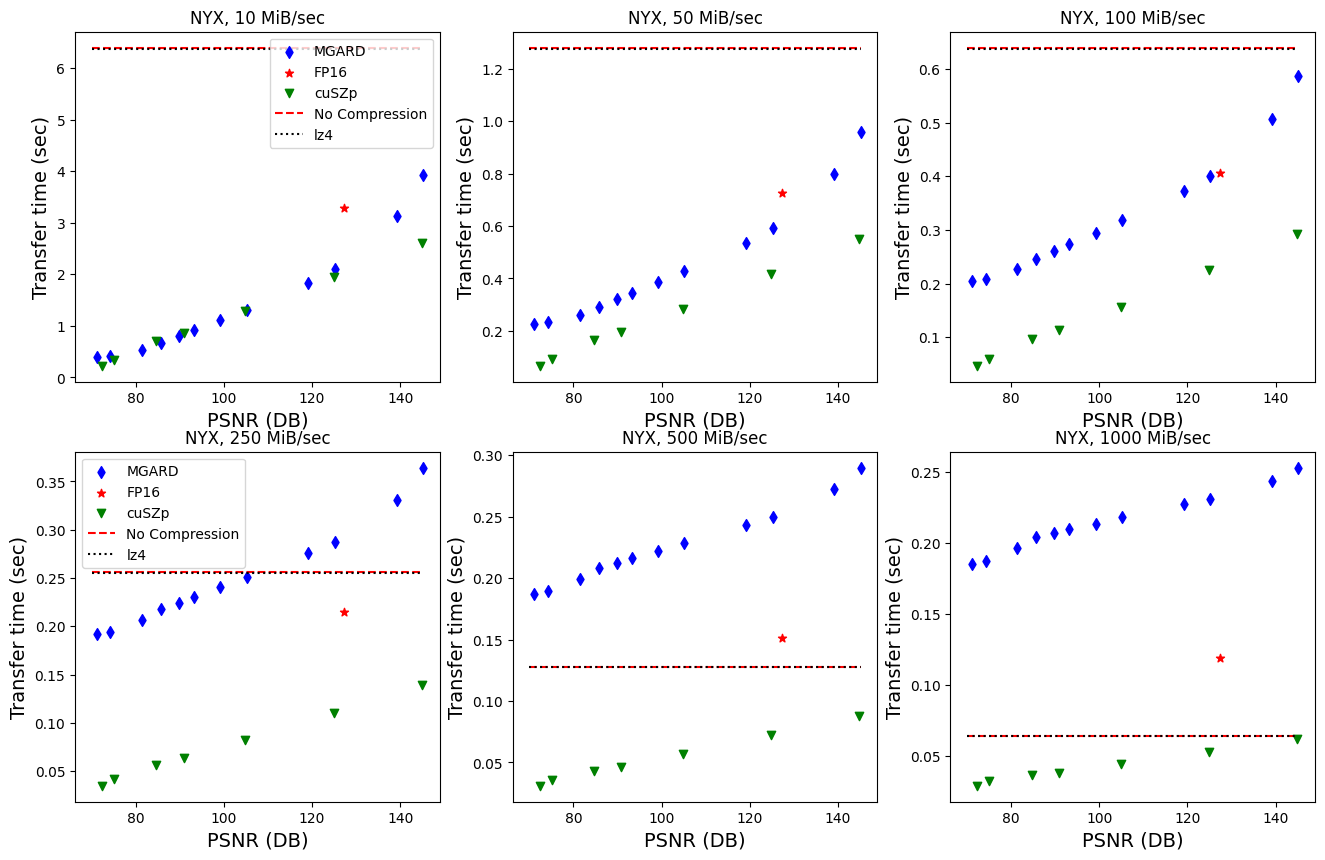

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10)) # (width and height)

# 1, 10, 100, 250, 500, 1000

datasets = [
    "NYX/SDRBENCH-EXASKY-NYX-512x512x512/dark_matter_density.f32",
    "SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32",
    "SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32",
    "JHTDB"
]

targetsize = 67108864
data_Size = 64
datasets = "NYX/SDRBENCH-EXASKY-NYX-512x512x512/dark_matter_density.f32"
data_name = "NYX" # "SCALE", "NYX"

filename = f"{data_Size}MIB_{data_name}_Transfertime"
## netBW = 1
net = 10
networkBw = net #MiB/sec
min_n = 70
max_n = 150

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][0].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][0].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][0].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][0].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][0].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][0].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[0][0].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[0][0].set_title(f"{data_name}, {net} MiB/sec")
axs[0][0].legend()

## netBW = 50
net = 50
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][1].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][1].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][1].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][1].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][1].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][1].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[0][1].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[0][1].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 100
net = 100
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][2].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][2].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][2].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][2].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][2].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][2].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[0][2].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[0][2].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 250
net = 250
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets)]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[1][0].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][0].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][0].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][0].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][0].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][0].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[1][0].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[1][0].set_title(f"{data_name}, {net} MiB/sec")
axs[1][0].legend()


## netBW = 500
net = 500
networkBw = net #MiB/sec


mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets)]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[1][1].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][1].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][1].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][1].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][1].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][1].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[1][1].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[1][1].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 1000
net = 1000
networkBw = net #MiB/sec


mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets)]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[1][2].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][2].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][2].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][2].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][2].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][2].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[1][2].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[1][2].set_title(f"{data_name}, {net} MiB/sec")


filename = f"{data_Size}MIB_{data_name}_Transfertime_new.png"
fig.savefig(filename,bbox_inches='tight',format="png",dpi=300)

     tol   oriSize  compressedsize  psnr  max_error  rmse  comp_ratio method  \
757  0.0  67108864        66867151   0.0        0.0   0.0    0.999939    LZ4   
760  0.0  67108864        66867151   0.0        0.0   0.0    0.999939    LZ4   

         time                                            data  
757  0.056154  SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32  
760  0.055943  SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32  


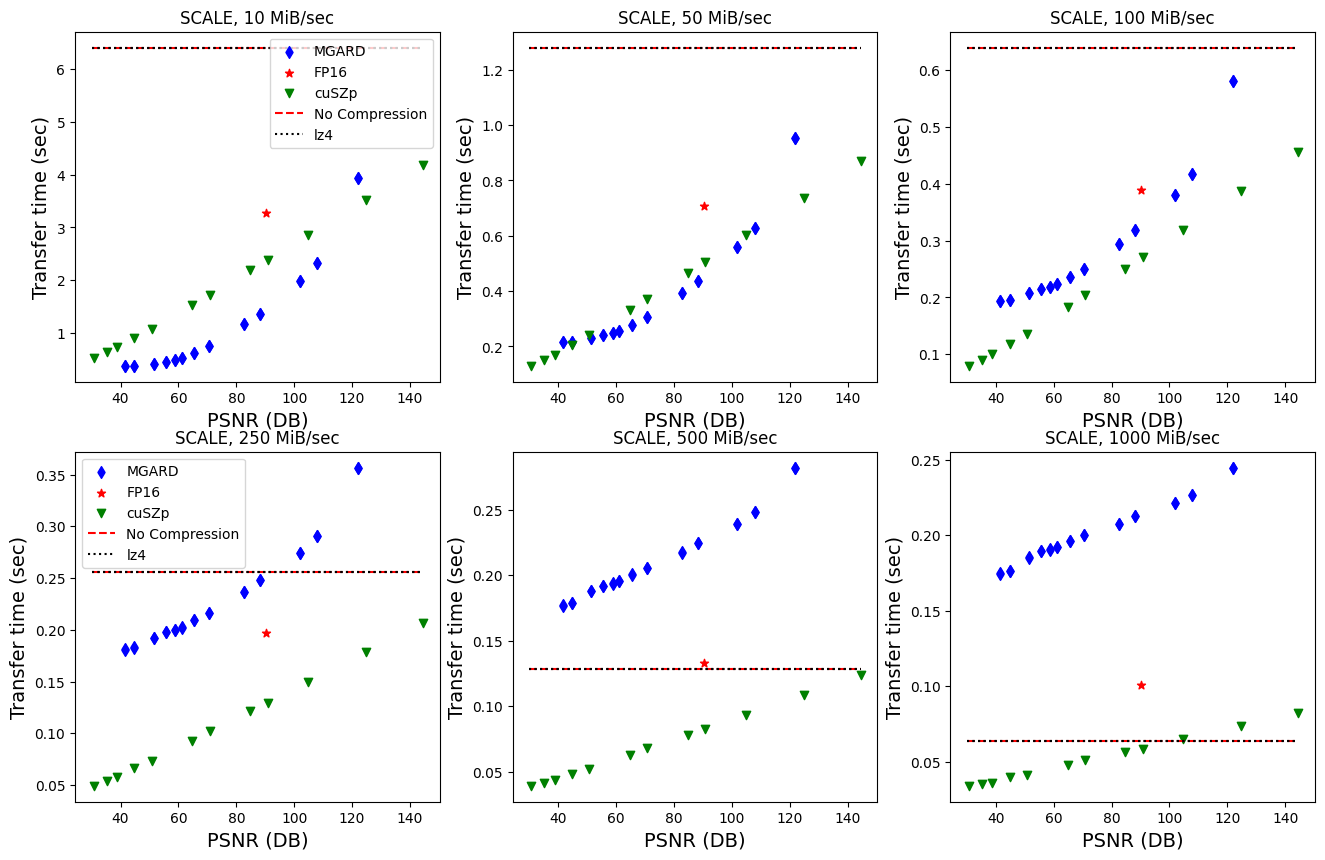

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10)) # (width and height)

# 1, 10, 100, 250, 500, 1000

datasets = [
    "NYX/SDRBENCH-EXASKY-NYX-512x512x512/dark_matter_density.f32",
    "SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32",
    "JHTDB"
]

targetsize = 67108864
data_Size = 64
datasets = "SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32"
data_name = "SCALE" # "SCALE", "NYX"

## netBW = 1
net = 10
networkBw = net #MiB/sec
min_n = 30
max_n = 150

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][0].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][0].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][0].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][0].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][0].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][0].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[0][0].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[0][0].set_title(f"{data_name}, {net} MiB/sec")
axs[0][0].legend()

## netBW = 50
net = 50
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets)]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][1].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][1].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][1].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][1].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][1].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][1].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[0][1].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[0][1].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 100
net = 100
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][2].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][2].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][2].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][2].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][2].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][2].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[0][2].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[0][2].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 250
net = 250
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[1][0].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][0].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][0].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][0].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][0].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][0].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[1][0].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[1][0].set_title(f"{data_name}, {net} MiB/sec")
axs[1][0].legend()


## netBW = 500
net = 500
networkBw = net #MiB/sec


mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[1][1].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][1].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][1].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][1].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][1].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][1].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[1][1].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[1][1].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 1000
net = 1000
networkBw = net #MiB/sec


mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw
print(lz4)

axs[1][2].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][2].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][2].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][2].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][2].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][2].set_xlabel("PSNR (DB)",fontsize=fsize)
axs[1][2].set_ylabel("Transfer time (sec)",fontsize=fsize)
axs[1][2].set_title(f"{data_name}, {net} MiB/sec")

filename = f"{data_Size}MIB_{data_name}_Transfertime_new.png"
fig.savefig(filename,bbox_inches='tight',format="png",dpi=300)

     tol    oriSize  compressedsize  psnr  max_error  rmse  comp_ratio method  \
759  0.0  536870912       536641575   0.0        0.0   0.0    0.999939    LZ4   
762  0.0  536870912       536641575   0.0        0.0   0.0    0.999939    LZ4   

         time                                            data  
759  0.413973  SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32  
762  0.413617  SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32  


Text(0.5, 1.0, 'SCALE, 1000 MiB/sec')

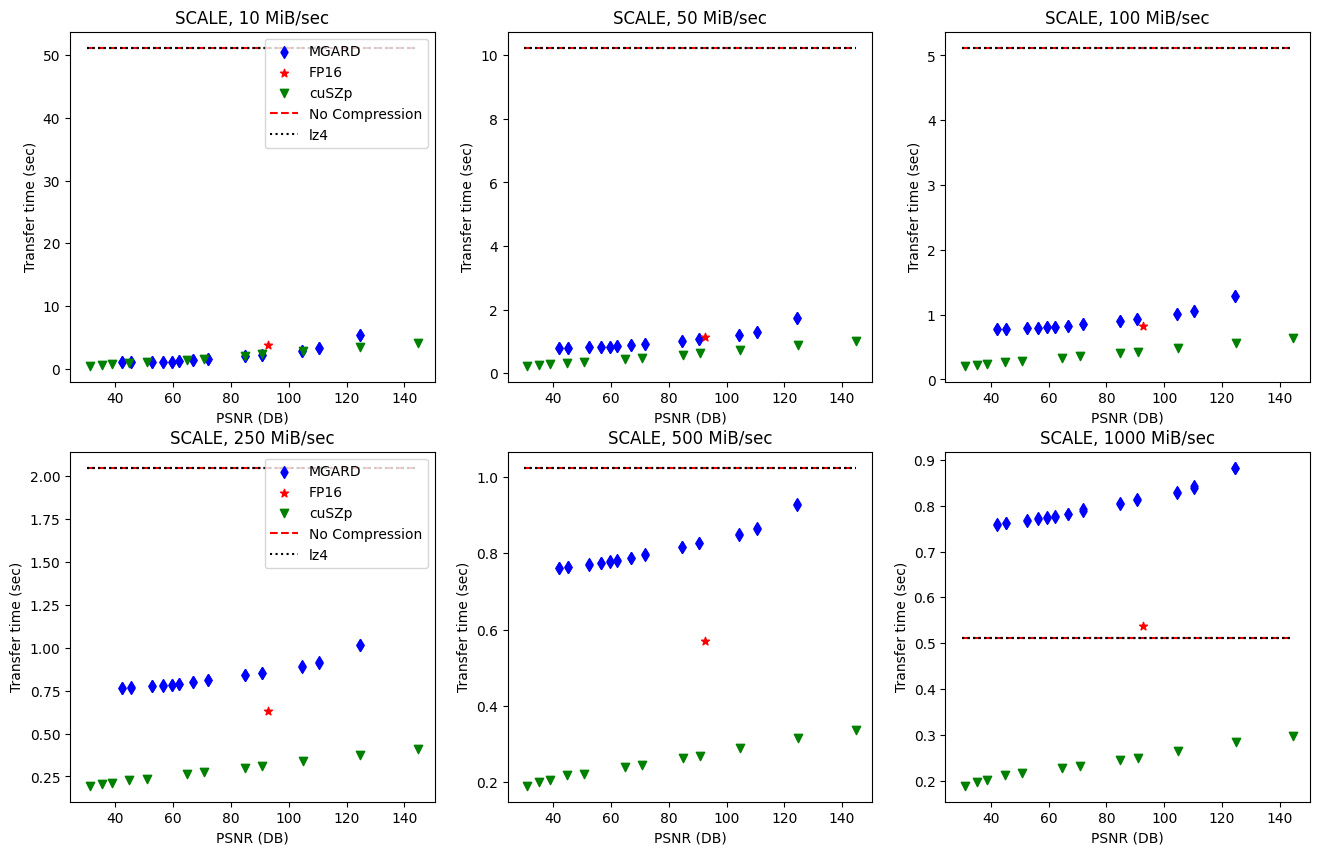

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10)) # (width and height)

# 1, 10, 100, 250, 500, 1000

datasets = [
    "NYX/SDRBENCH-EXASKY-NYX-512x512x512/dark_matter_density.f32",
    "SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32",
    "JHTDB"
]

targetsize = 67108864*8
data_Size = 64
datasets = "SDRBENCH-SCALE_98x1200x1200/V-98x1200x1200.f32"
data_name = "SCALE" # "SCALE", "NYX"

## netBW = 1
net = 10
networkBw = net #MiB/sec
min_n = 30
max_n = 150

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][0].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][0].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][0].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][0].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][0].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][0].set_xlabel("PSNR (DB)")
axs[0][0].set_ylabel("Transfer time (sec)")
axs[0][0].set_title(f"{data_name}, {net} MiB/sec")
axs[0][0].legend()

## netBW = 50
net = 50
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets)]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][1].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][1].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][1].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][1].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][1].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][1].set_xlabel("PSNR (DB)")
axs[0][1].set_ylabel("Transfer time (sec)")
axs[0][1].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 100
net = 100
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[0][2].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[0][2].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[0][2].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[0][2].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[0][2].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[0][2].set_xlabel("PSNR (DB)")
axs[0][2].set_ylabel("Transfer time (sec)")
axs[0][2].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 250
net = 250
networkBw = net #MiB/sec

mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[1][0].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][0].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][0].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][0].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][0].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][0].set_xlabel("PSNR (DB)")
axs[1][0].set_ylabel("Transfer time (sec)")
axs[1][0].set_title(f"{data_name}, {net} MiB/sec")
axs[1][0].legend()


## netBW = 500
net = 500
networkBw = net #MiB/sec


mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw

axs[1][1].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][1].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][1].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][1].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][1].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][1].set_xlabel("PSNR (DB)")
axs[1][1].set_ylabel("Transfer time (sec)")
axs[1][1].set_title(f"{data_name}, {net} MiB/sec")


## netBW = 1000
net = 1000
networkBw = net #MiB/sec


mgard = df[(df["oriSize"] == targetsize) & (df["method"] == "MGARD") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
fp16 = df[(df["oriSize"] == targetsize) & (df["method"] == "numpy") & (df["data"] == datasets) & (df["psnr"] < max_n)& (df["psnr"] > min_n)]
cuszp = df[(df["oriSize"] == targetsize) & (df["method"] == "cuSZp") & (df["data"] == datasets) & (df["psnr"] > min_n) & (df["psnr"] < max_n)]
lz4 = df[(df["oriSize"] == targetsize) & (df["method"] == "LZ4") & (df["data"] == datasets) ]

fp16_comp_ratio = 2

MGARD_total_time = mgard["time"] + data_Size/np.array(mgard["comp_ratio"].values)/networkBw
cuSZp_total_time = cuszp["time"] + data_Size/np.array(cuszp["comp_ratio"].values)/networkBw
fp16_total_time = fp16["time"] + data_Size/fp16_comp_ratio/networkBw

psnr_max = max(max(mgard["psnr"].values),max(cuszp["psnr"].values))

# no cmp and lz4 cmp
no_comp_time = targetsize/1024/1024/networkBw
lz4_comp_time = targetsize/lz4["comp_ratio"]/1024/1024/networkBw
print(lz4)

axs[1][2].scatter(mgard["psnr"].values, MGARD_total_time, label='MGARD', marker='d', color='blue')
axs[1][2].scatter(fp16["psnr"].values[0],fp16_total_time.values[0], label="FP16",color="red",marker='*')
axs[1][2].scatter(cuszp["psnr"].values,cuSZp_total_time,label="cuSZp",color="green",marker='v')
axs[1][2].hlines(no_comp_time, xmin=min_n, xmax=psnr_max, color='red', linestyle='--', label='No Compression')
axs[1][2].hlines(lz4_comp_time, xmin=min_n, xmax=psnr_max, color='black', linestyle=':', label='lz4')
axs[1][2].set_xlabel("PSNR (DB)")
axs[1][2].set_ylabel("Transfer time (sec)")
axs[1][2].set_title(f"{data_name}, {net} MiB/sec")